In [64]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [65]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# saved as classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


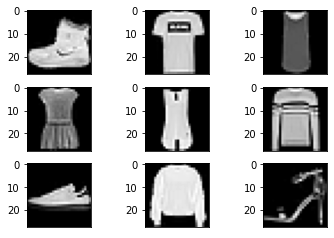

In [66]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.xticks([])
  plt.xticks([])
 
# show the figure
plt.show()

In [67]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

train_images_norm, test__image_norm = prep_pixels(x_train, x_test)

In [68]:
# Characteristic Vector
def flatten(t):
  return[ item for sublist in t for item in sublist]

# Achatamento do vetor para entrar no modelo
train_images_features = [flatten(image) for image in train_images_norm]
test_images_features = [flatten(image) for image in test__image_norm]

# Sklearning

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [70]:
ann = MLPClassifier(
    hidden_layer_sizes=(128,),
    solver='adam',
    activation='relu',
    learning_rate_init=0.001,
    max_iter=10,
    random_state=42,
    verbose=True
) 

In [71]:
ann.fit(train_images_features, y_train)

Iteration 1, loss = 0.58955019
Iteration 2, loss = 0.42246219
Iteration 3, loss = 0.38222630
Iteration 4, loss = 0.35730081
Iteration 5, loss = 0.33768557
Iteration 6, loss = 0.31672571
Iteration 7, loss = 0.30669854
Iteration 8, loss = 0.29504787
Iteration 9, loss = 0.28465529
Iteration 10, loss = 0.27497446


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, random_state=42,
              verbose=True)

In [72]:
y_ann_pred = ann.predict(test_images_features)
accuracy_score(y_test, y_ann_pred)

0.8811

# TensorFlow

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
with tf.device('/device:GPU:0'):
  model.fit(train_images_norm, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5015 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3751 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3112 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2802 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2698 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2572 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2492 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

In [ ]:
loss, acc = model.evaluate(test_norm, y_test)

print(f'Loss and Accuracy: {loss, acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8795
Loss and Accuracy: (0.3436046838760376, 0.8794999718666077).2
